In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings 
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("/Users/jenniferanhly/Downloads/Mall_Customers.csv")

The dataset contains 200 customers with features such as CustomerID, Gender, Age, Annual Income (k$), and Spending Score (1-100).

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Univariate Analysis

The dataset shows wide variability in income (standard deviation of ~26.26k) and spending score (standard deviation of ~25.82).

Key percentiles for age:

25% of the customers are younger than 28.75 years.

50% of the customers are younger than 36 years.

75% of the customers are younger than 49 years.

For annual income:
25% of customers earn less than $41.5k

50% of customers earn less than $61.5k

75% of customers earn less than $78k

In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

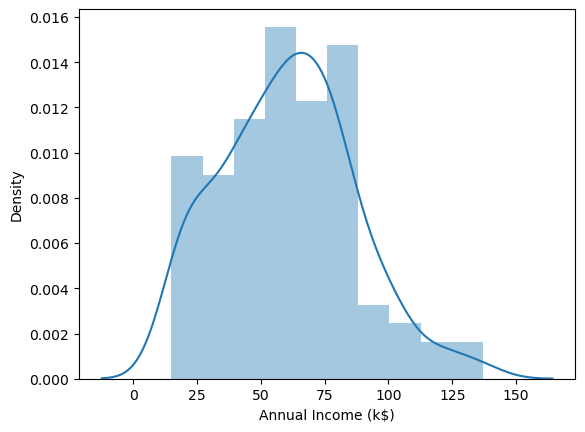

In [7]:
sns.distplot(df['Annual Income (k$)'])

In [8]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

<Figure size 640x480 with 0 Axes>

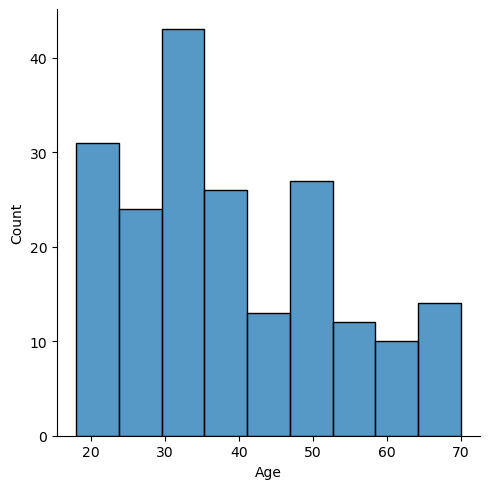

<Figure size 640x480 with 0 Axes>

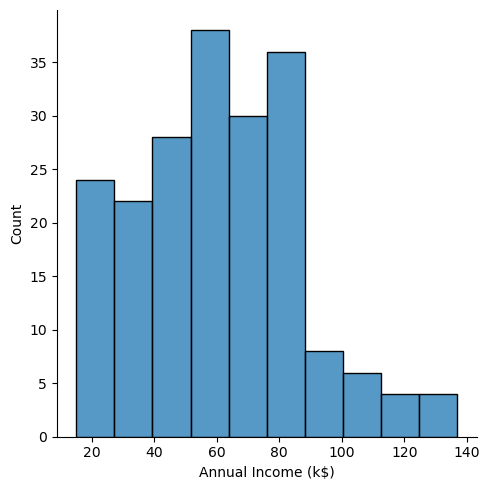

<Figure size 640x480 with 0 Axes>

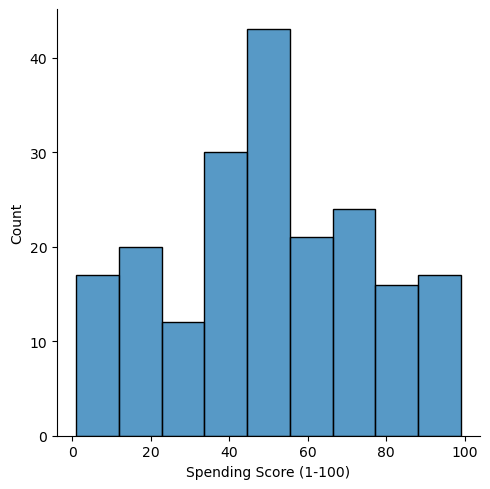

In [9]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.displot(df[i])

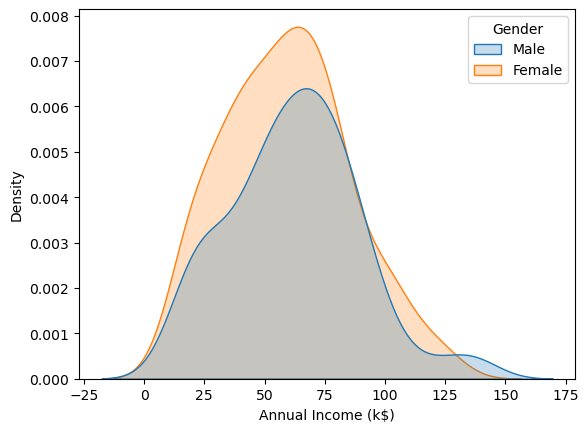

In [10]:
sns.kdeplot(x=df['Annual Income (k$)'],shade=True,hue=df['Gender']);

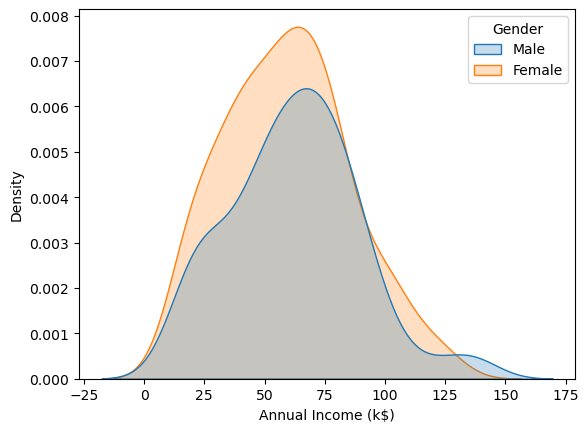

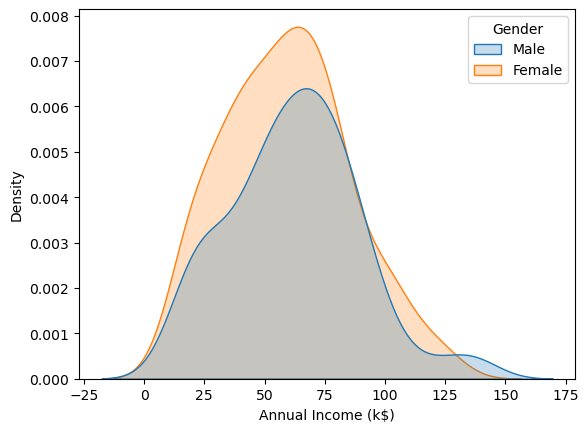

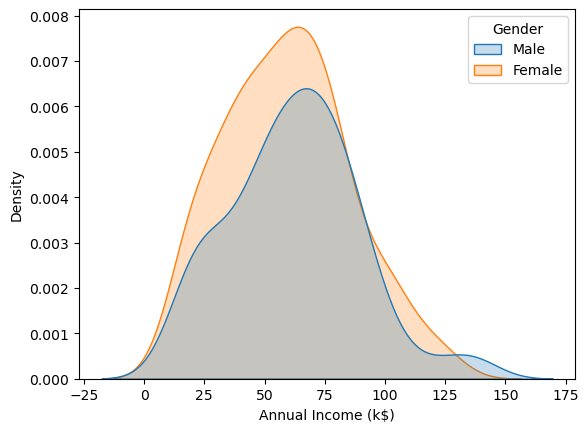

In [11]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.kdeplot(x=df['Annual Income (k$)'],shade=True,hue=df['Gender']);

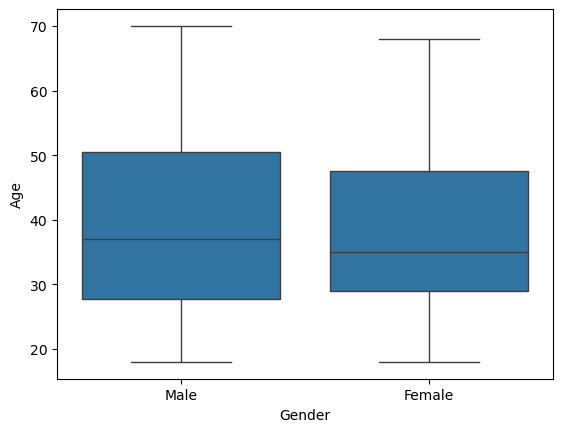

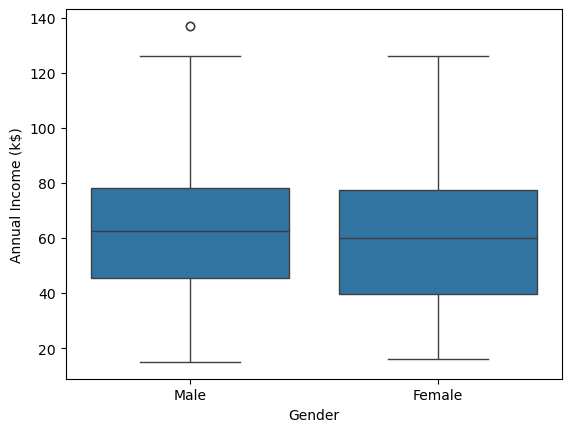

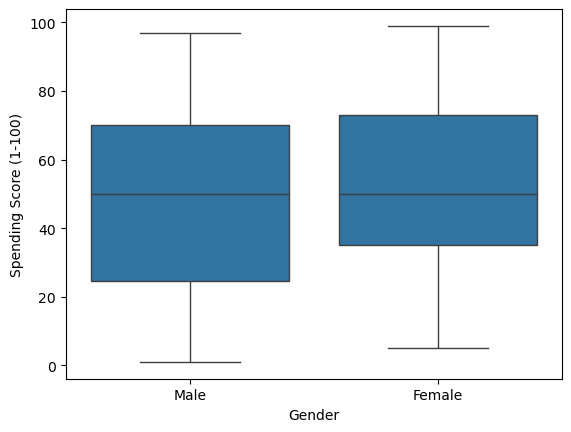

In [12]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.boxplot(data=df,x='Gender',y=df[i])

In [13]:
df['Gender'].value_counts(normalize=True)

Gender
Female    0.56
Male      0.44
Name: proportion, dtype: float64

# Bivariate Analysis

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

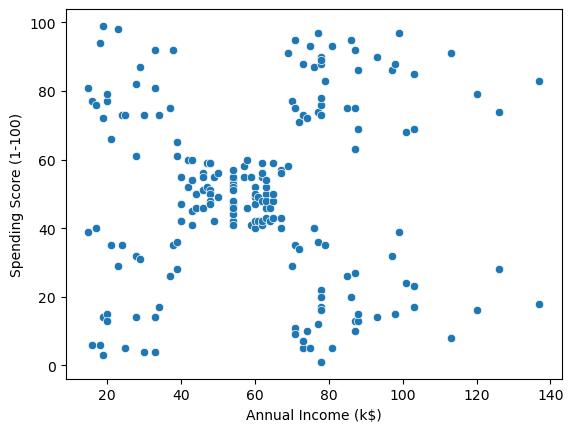

In [15]:
sns.scatterplot(data=df,x='Annual Income (k$)',y='Spending Score (1-100)')

Visualization: A pair plot visualizes the pairwise relationships between multiple features, such as age, annual income, and spending score.

Insights: There are visible patterns in how different clusters relate across features. For instance, clusters of customers with high spending scores tend to appear within a specific income range. The pair plot helps highlight relationships between multiple features and how they contribute to clustering results.

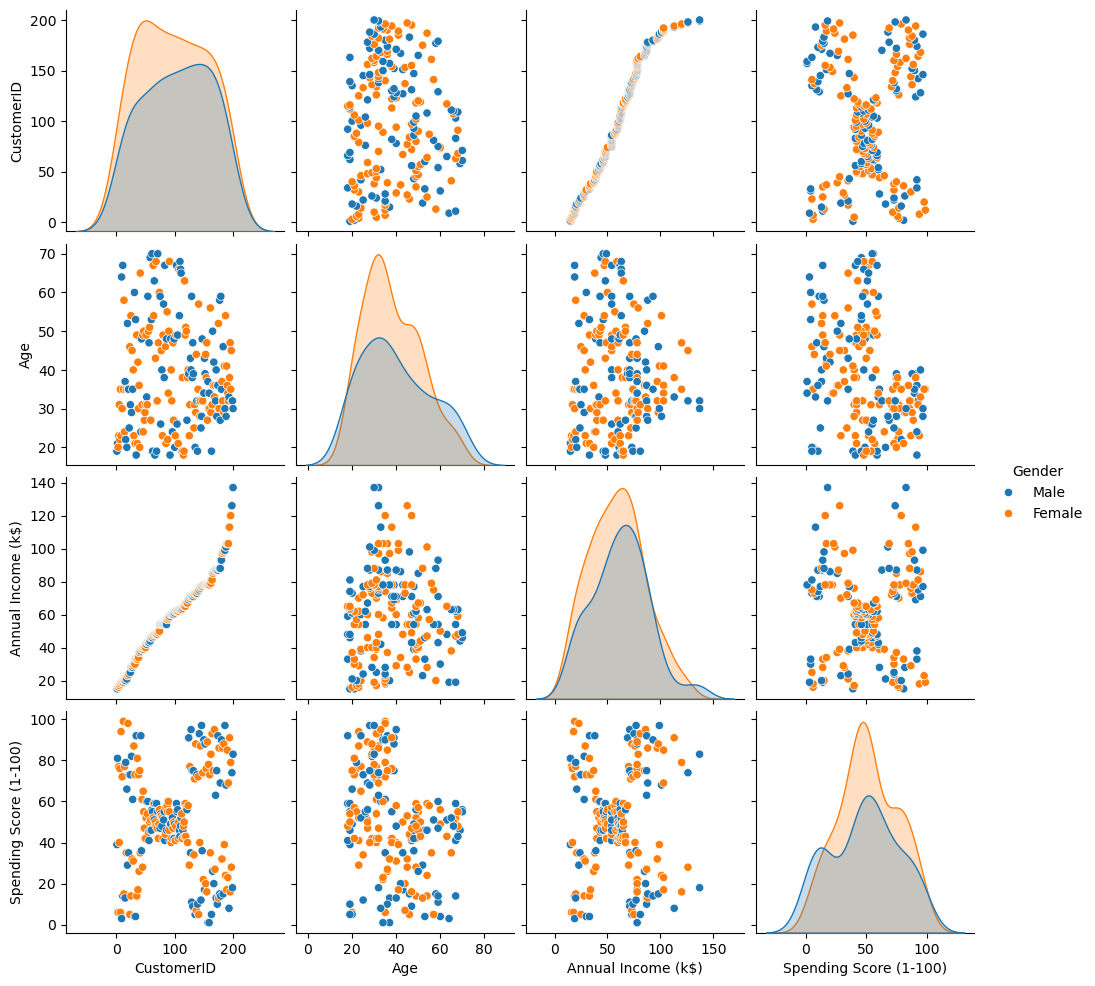

In [16]:
#df=df.drop('CustomerID',axis=1)
sns.pairplot(df,hue='Gender')


# Clustering - Univariate, Bivariate, Multivariate

In [69]:
clustering1 = KMeans(n_clusters=3)

In [71]:
clustering1.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=3)

In [73]:
clustering1.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [75]:
df['Income Cluster'] = clustering1.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,2
2,3,Female,20,16,6,2
3,4,Female,23,16,77,2
4,5,Female,31,17,40,2


In [77]:
df['Income Cluster'].value_counts()

Income Cluster
0    86
2    58
1    56
Name: count, dtype: int64

In [79]:
clustering1.inertia_

25640.45778439684

In [81]:
inertia_scores=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)']])
    inertia_scores.append(kmeans.inertia_)

In [83]:
inertia_scores

[137277.28000000006,
 49761.73701298703,
 23528.15217391306,
 13278.112713472483,
 8481.49619047619,
 5728.855832763729,
 3950.2126984127017,
 2871.661599511601,
 2469.500395682748,
 2059.7040136334253]

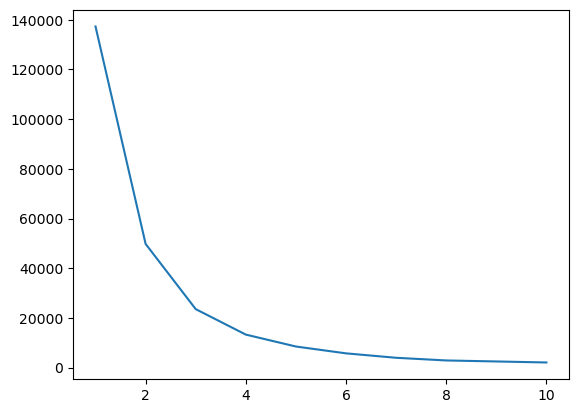

In [85]:
plt.plot(range(1,11),inertia_scores)

In [87]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Income Cluster'],
      dtype='object')

In [91]:
df.groupby('Income Cluster')[['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,41.279070,60.906977,50.337209
1,36.910714,92.142857,50.517857
2,37.120690,29.551724,49.689655


# Bivariate Clustering

In [129]:
clustering2 = KMeans(n_clusters=5)
clustering2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
df['Spending and Income Cluster'] =clustering2.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,2,3
1,2,Male,21,15,81,2,4
2,3,Female,20,16,6,2,3
3,4,Female,23,16,77,2,4
4,5,Female,31,17,40,2,3


Visualization: The elbow plot demonstrates the inertia or sum of squared distances between customers within clusters against the number of clusters (K).

Insights: The elbow point suggests that K=5 is an optimal number of clusters, as this is where the inertia starts to diminish at a slower rate. After K=5, adding more clusters only marginally reduces the inertia, implying that further segmentation might not provide significant value.

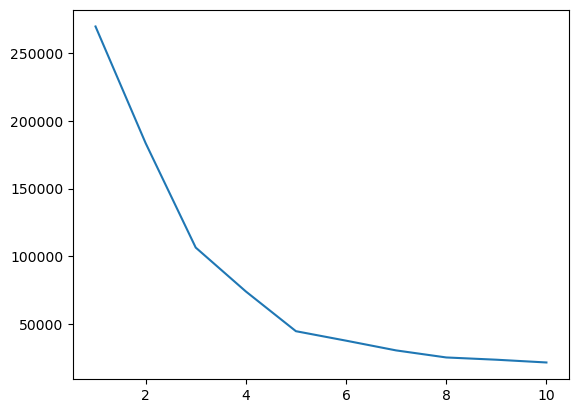

In [131]:
inertia_scores2=[]
for i in range(1,11):
    kmeans2=KMeans(n_clusters=i)
    kmeans2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
    inertia_scores2.append(kmeans2.inertia_)
plt.plot(range(1,11),inertia_scores2)

In [133]:
centers =pd.DataFrame(clustering2.cluster_centers_)
centers.columns = ['x','y']

Visualization: This scatter plot shows how the KMeans algorithm clusters customers based on their annual income and spending score.

Insights: Clear separation of clusters is visible, showing distinct groups of customers with low, medium, and high spending scores and income levels. There are clusters where customers with higher income do not necessarily have a higher spending score, suggesting that income is not the sole predictor of spending behavior. The cluster centers are marked with asterisks, indicating the central point of each cluster, which represent the "average" customer in that segment.


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

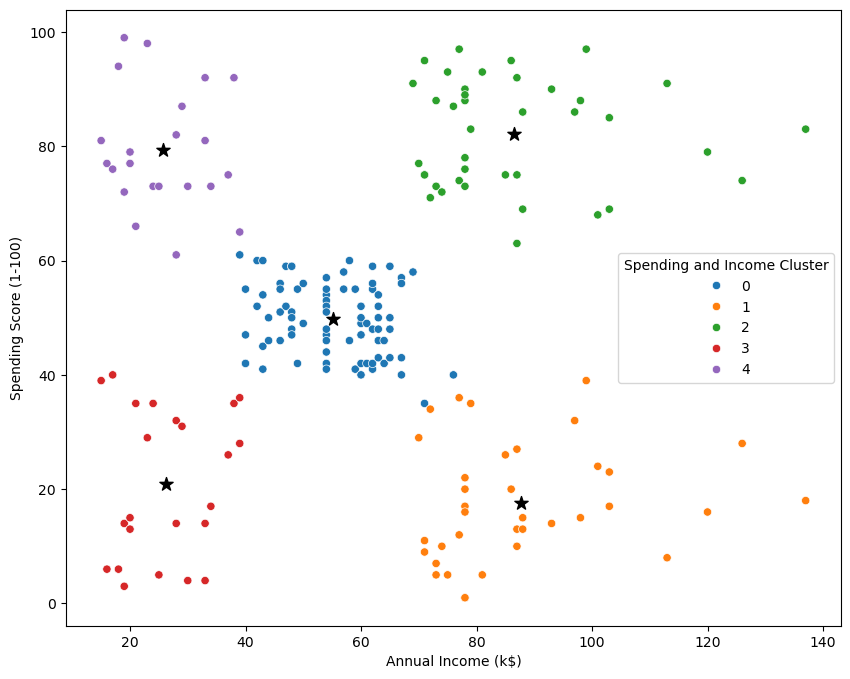

In [135]:
plt.figure(figsize=(10,8))
plt.scatter(x=centers['x'],y=centers['y'],s=100,c='black',marker='*')
sns.scatterplot(data=df, x ='Annual Income (k$)',y='Spending Score (1-100)',hue='Spending and Income Cluster',palette='tab10')

In [137]:
pd.crosstab(df['Spending and Income Cluster'],df['Gender'],normalize= 'index')

Gender,Female,Male
Spending and Income Cluster,,
0,0.587500,0.412500
1,0.472222,0.527778
2,0.538462,0.461538
3,0.608696,0.391304
4,0.590909,0.409091


In [139]:
df.groupby('Spending and Income Cluster')[['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income Cluster,,,
0,42.937500,55.087500,49.712500
1,40.666667,87.750000,17.583333
2,32.692308,86.538462,82.128205
3,45.217391,26.304348,20.913043
4,25.272727,25.727273,79.363636


# Multivariate Clustering

In [28]:
from sklearn.preprocessing import StandardScaler

In [30]:
scale = StandardScaler()

In [148]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,2,3
1,2,Male,21,15,81,2,4
2,3,Female,20,16,6,2,3
3,4,Female,23,16,77,2,4
4,5,Female,31,17,40,2,3


In [152]:
dff = pd.get_dummies(df,drop_first=True)
dff.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster,Gender_Male
0,1,19,15,39,2,3,True
1,2,21,15,81,2,4,True
2,3,20,16,6,2,3,False
3,4,23,16,77,2,4,False
4,5,31,17,40,2,3,False


In [154]:
dff.columns

Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Income Cluster', 'Spending and Income Cluster', 'Gender_Male'],
      dtype='object')

In [158]:
dff = dff[['Age', 'Annual Income (k$)', 'Spending Score (1-100)','Gender_Male']]
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,True
1,21,15,81,True
2,20,16,6,False
3,23,16,77,False
4,31,17,40,False


# Conclusion:

This project provides a structured way to segment customers using KMeans clustering, allowing businesses to target their marketing strategies effectively. The clustering approach reveals key insights into customer behavior, helping the marketing team make data-driven decisions.